<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Regressao_linear/blob/main/Regressao_Linear_Simples_Aprovacao_Alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
apr_alunos = pd.read_excel('/content/drive/MyDrive/aprovacao_alunos.xlsx')
apr_alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [3]:
apr_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [4]:
apr_alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


<Axes: xlabel='ano_2016', ylabel='Count'>

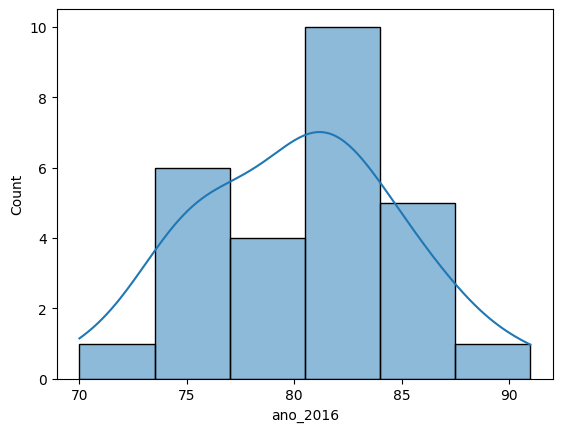

In [5]:
sns.histplot(apr_alunos, x='ano_2016', kde=True)

<Axes: xlabel='ano_2015', ylabel='Count'>

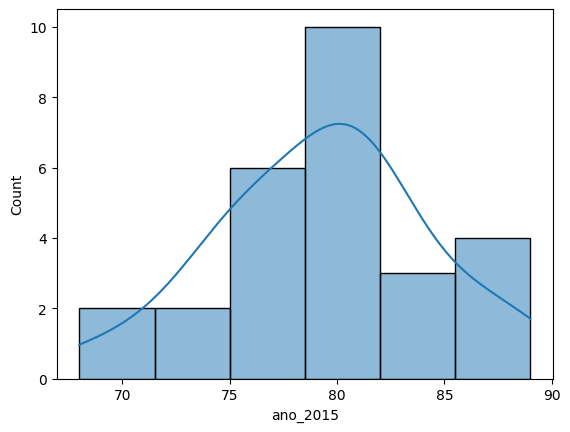

In [6]:
sns.histplot(apr_alunos, x='ano_2015', kde=True)

In [7]:
apr_alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


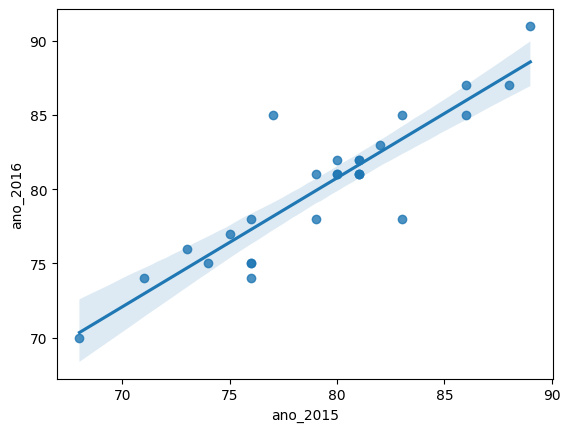

In [8]:
sns.regplot(x='ano_2015', y='ano_2016', data=apr_alunos);

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
apr_alunos2 = pd.DataFrame(scaler.fit_transform(apr_alunos), index=apr_alunos.index,columns=apr_alunos.columns)
apr_alunos2.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [10]:
apr_alunos2.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


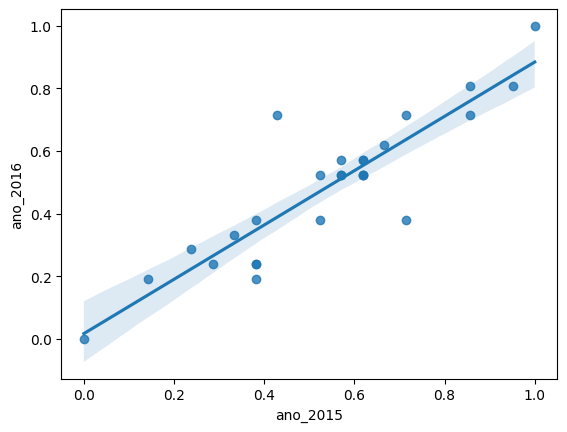

In [11]:
sns.regplot(x='ano_2015', y='ano_2016', data=apr_alunos2);

In [23]:
import statsmodels.formula.api as smf

In [24]:
function = 'ano_2016~ano_2015'
model = smf.ols(formula=function, data=apr_alunos2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           3.02e-10
Time:                        16:41:14   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [25]:
x = apr_alunos2[['ano_2015']]
y = apr_alunos2[['ano_2016']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
r_sq = lr.score(x_train, y_train)
print(r_sq)

0.8573811509591327


In [19]:
y_pred_treino = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_treino))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_treino)))

MAE: 0.06424224772848623
MSE: 0.007182646326377206
RMSE: 0.08475049454945502


In [20]:
lr.fit(x_test, y_test)

LinearRegression()

In [21]:
y_pred_teste = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_teste))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_teste)))

MAE: 0.08598680436029836
MSE: 0.012932872836774158
RMSE: 0.1137227894345463
